# Chapter 3
## Finite Markov Decision Process

### 3.1 The Agent-Environment Interface

#### Exercise 3.1
Devise three example tasks of your own that fit into the MDP framework, identifying for each its states, actions, and rewards. Make the three examples as diferent from each other as possible. The framework is abstract and flexible and can be applied in many diferent ways. Stretch its limits in some way in at least one of your examples.

- ***Inventory Management in Retail***

  - ***States: current inventory levels of various products in a retail store***
  - ***Actions: restocking, discounting, or leaving inventory unchanged***
  - ***Rewards: might be based on sales revenue, with positive rewards for selling products at full price and negative rewards for holding excess inventory or discounting heavily***

- ***Robot Navigation in a Maze***

  - ***States: robot's position within a maze***
  - ***Actions: the robot's movement directions (e.g., up, down, left, right)***
  - ***Rewards: positive reward for reaching the goal state, negative reward for hitting obstacles or taking longer paths***

- ***Healthcare Treatment Planning***

  - ***States: current health condition of a patient (e.g., vital signs, symptoms, test results)***
  - ***Actions: prescribing medication, ordering tests, or recommending lifestyle changes***
  - ***Rewards: could be based on patient outcomes, such as improved health or reduced symptoms, with penalties for adverse effects of treatments or worsening conditions. Additionally, rewards may also consider cost-effectiveness of treatments***

#### Exercise 3.2
Is the MDP framework adequate to usefully represent all goal-directed learning tasks? Can you think of any clear exceptions?

- ***An exception could be a task where the transition probabilities not only depends on the actual state, but previous states, breaking the Markov property. An example could be weather forecast, where the likekihood of the next weather conditions depends on preceding conditions***
- ***Another exception can occur when the agent cannot fully identify a state inside the environment (partial observability), altough they can be converted to MDPs***

#### Exercise 3.3
Consider the problem of driving. You could define the actions in terms of the accelerator, steering wheel, and brake, that is, where your body meets the machine. Or you could define them farther out—say, where the rubber meets the road, considering your actions to be tire torques. Or you could define them farther in—say, where your brain meets your body, the actions being muscle twitches to control your limbs. Or you could go to a really high level and say that your actions are your choices of where to drive. What is the right level, the right place to draw the line between agent and environment? On what basis is one location of the line to be preferred over another? Is there any fundamental reason for preferring one location over another, or is it a free choice?

- ***There are various factors to consider where to draw the line between the agent and the environment: task complexity, observation space, action space, computational efficienty, etc.***
- ***There is no a "better" location over the others. The choice of the level of abstraction is a trade-off between complexity and generalization***
- ***It is also possible to combine two or more levels of abstraction in a hierarchical learning system***

#### Exercise 3.4
Give a table analogous to that in Example 3.3, but for $p(s', r|s, a)$. It should have columns for $s$, $a$, $s'$, $r$, and $p(s', r | s, a)$, and a row for every 4-tuple for which $p(s', r|s, a) > 0$.

- ***Similar to Example 3.3 because rewards are deterministic given $s$, $a$ and $s'$***

|  $s$  |    $a$    | $s'$ |      $r$      | $p(s', r \| s, a)$ |
|-------|-----------|------|---------------|--------------------|
| high  | search    | high | $r_{search}$  | $\alpha$           |
| high  | search    | low  | $r_{search}$  | $1 - \alpha$       |
| low   | search    | high | $-3$          | $1 - \beta$        |
| low   | search    | low  | $r_{search}$  | $\beta$            |
| high  | wait      | high | $r_{waig}$    | $1$                |
| low   | wait      | low  | $r_{wait}$    | $1$                |
| low   | recharge  | high | $0$           | $1$                |

#### Exercise 3.5
The equations in Section 3.1 are for the continuing case and need to be modified (very slightly) to apply to episodic tasks. Show that you know the modifications needed by giving the modified version of (3.3).

- $\sum_{s'\in S^+} \sum_{r\in R} p(s', r | s, a) = 1$ for all $s\in S^+$, $a\in A$

#### Exercise 3.6
Suppose you treated pole-balancing as an episodic task but also used discounting, with all rewards zero except for $−1$ upon failure. What then would the return be at each time? How does this return differ from that in the discounted,  continuing formulation of this task?

- $G_t = - \gamma^{T-t-1}$ for all $t < T$, with $G_T = 0$

#### Exercise 3.7
Imagine that you are designing a robot to run a maze. You decide to give it a reward of $+1$ for escaping from the maze and a reward of zero at all other times. The task seems to break down naturally into episodes—the successive runs through the maze—so you decide to treat it as an episodic task, where the goal is to maximize expected total reward (3.7). After running the learning agent for a while, you find that it is showing no improvement in escaping from the maze. What is going wrong? Have you efectively communicated to the agent what you want it to achieve?

- ***The agent will receive a sparse reward, $+1$ independently of the time taken to solve the maze, so it does not have a notion of the time taken to reach the goal. Thus, the agent will not improve as it does not have a way to differentiante between short and long runs. A way of solving this is to add a discounting factor to the return, or to change to a negative reward (e.g. $-1$) when the robot is not escaping form the maze.***

#### Exercise 3.8
Suppose $\gamma$ = 0.5 and the following sequence of rewards is received $R_1 = −1$, $R_2 = 2$, $R_3 = 6$, $R_4 = 3$, and $R_5 = 2$, with $T = 5$. What are $G_0$, $G_1$, $...$, $G_5$? Hint: Work backwards.

- $G_5 = 0$
- $G_4 = R_5 + \gamma G_5 = 2$
- $G_3 = R_4 + \gamma G_4 = 4$
- $G_2 = R_3 + \gamma G_3 = 8$
- $G_1 = R_2 + \gamma G_2 = 6$
- $G_0 = R_1 + \gamma G_1 = 2$

#### Exercise 3.9
Suppose $\gamma$ = 0.9 and the reward sequence is $R_1 = 2$ followed by an infinite sequence of $7$ s. What are $G_1$ and $G_0$?

- $G_1 = \sum_{k=0}^{\infty} \gamma^k R_{k+2} = 7 * \frac{1}{1-0.9} = 70$
- $G_0 = R_1 + \gamma G_1 = 65$

#### Exercise 3.10
Prove the second equality in (3.10).

- $G_t = \sum_{k=0}^{\infty} \gamma^k = \sum_{k=-1}^{\infty} \gamma^{k+1} = 1 + \sum_{k=0}^{\infty} \gamma^{k+1}$
- $\gamma G_t = \sum_{k=0}^{\infty} \gamma^{k+1}$
- $\gamma G_t - G_t = 1 + \sum_{k=0}^{\infty} \gamma^{k+1} - \sum_{k=0}^{\infty} \gamma^{k+1} = 1$
- $G_t = \sum_{k=0}^{\infty} \gamma^k = \frac{1}{1-\gamma}$

#### Exercise 3.11
If the current state is $S_t$, and actions are selected according to a stochastic policy $\pi$, then what is the expectation of $R_{t+1}$ in terms of $\pi$ and the four-argument function $p$ (3.2)?

- $\mathbb{E}[R_{t+1} | S_t = s] = \sum_{a} \pi(a | s) * \mathbb{E}[R_{t+1} | S_t = s, A_t = a] = \sum_{a} \pi(a | s) \sum_{r} r \sum_{s'} p(s', r | s, a)$

#### Exercise 3.12
Give an equation for $v_\pi$ in terms of $q_\pi$ and $\pi$.

- $v_\pi(s) = \sum_a \pi(a | s) * q_\pi(s, a)$

#### Exercise 3.13
Give an equation for $q_\pi$ in terms of $v_\pi$ and the four-argument $p$.

- $q_\pi(s, a) = \sum_{s',r} p(s', r | s, a) [r + \gamma v_\pi(s')]$

#### Example 3.5: Gridworld

In [1]:
from itertools import product

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import gridworld

seed = 42
exceptional_reward_dynamics = {
    "A": {"from": (0, 1), "to": (4, 1), "reward": 10.0},
    "B": {"from": (0, 3), "to": (2, 3), "reward": 5.0}
}
env = gym.make("GridWorld-v0", shape=(5, 5), reward_dynamics=exceptional_reward_dynamics)
policy = 0.25 * np.ones(tuple(env.observation_space.nvec) + (env.action_space.n,), dtype=np.float32)
action_str = ["right", "up", "left", "down"]
env.reset(seed=seed)
np.random.seed(seed)

In [2]:
state, _ = env.reset()
print("Initial state:", state)
env.render()

Initial state: [3 2]
. A . B . 
. . . . . 
. . . B'. 
. . x . . 
. A'. . . 


In [3]:
action = np.random.choice(env.action_space.n, p=policy[tuple(state)].flatten())
state, reward, _, _, info = env.step(action)
print("Action:", action_str[action])
print("Reward:", reward)
print("State:", state)
env.render()

Action: up
Reward: 0.0
State: [2 2]
. A . B . 
. . . . . 
. . x B'. 
. . . . . 
. A'. . . 


#### Figure 3.2

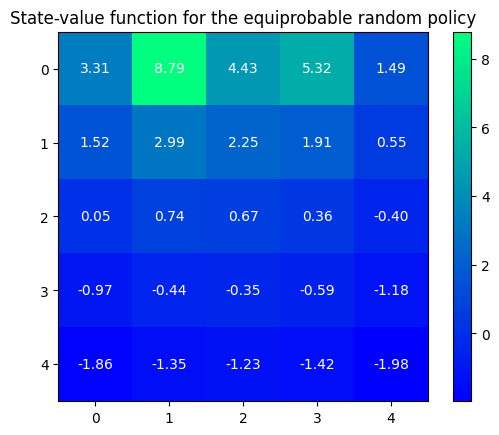

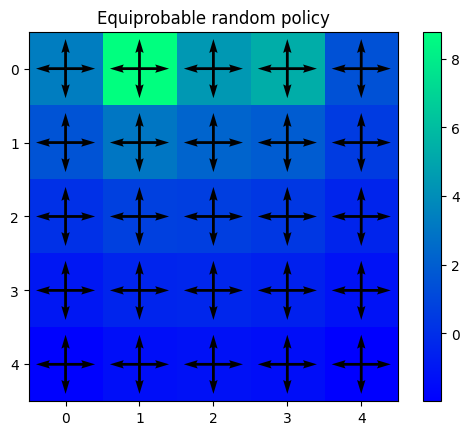

In [4]:
gamma = 0.9
num_states = env.observation_space.nvec.prod()
num_actions = env.action_space.n
P = env.unwrapped.prob.reshape(num_states, num_actions, num_states)
R = env.unwrapped.rewards.reshape(num_states, num_actions, 1)

pol_eval = policy.reshape(num_states, 1, num_actions)
P_eval = np.eye(num_states) - gamma * (pol_eval @ P).squeeze()
R_eval = (pol_eval @ R).squeeze()
V_eval = np.linalg.solve(P_eval, R_eval)

V = V_eval.reshape(env.observation_space.nvec)
plt.imshow(V, cmap="winter")
for state in product(*[range(i) for i in V.shape]):
    plt.text(*state[::-1], f"{V[state]:.2f}", ha="center", va="center", color="white")
plt.title("State-value function for the equiprobable random policy")
plt.colorbar()
plt.show()

argmax = policy == np.max(policy, axis=2, keepdims=True)
right, up, left, down = argmax.transpose(2, 0, 1).astype(np.float32)
zeros = np.zeros(env.observation_space.nvec, dtype=int)
scale = 2.5 * np.max(env.observation_space.nvec)
plt.imshow(V, cmap="winter")
plt.title("Equiprobable random policy")
plt.colorbar()
plt.quiver(right, zeros, scale=scale)
plt.quiver(zeros, up, scale=scale)
plt.quiver(-left, zeros, scale=scale)
plt.quiver(zeros, -down, scale=scale)
plt.show()

#### Exercise 3.14
The Bellman equation (3.14) must hold for each state for the value function $v_\pi$ shown in Figure 3.2 (right) of Example 3.5. Show numerically that this equation holds for the center state, valued at $+0.7$, with respect to its four neighboring states, valued at $+2.3$, $+0.4$, $−0.4$, and $+0.7$. (These numbers are accurate only to one decimal place).

- $v_\pi(s) = \sum_a \pi(a | s) * \sum_{s',r} p(s', r | s, a) [r + \gamma v_\pi(s')]$
- $0.67 \simeq 0.25 * 0.9 * (2.25 + 0.36 - 0.35 + 0.74) = 0.675$

#### Exercise 3.15
In the gridworld example, rewards are positive for goals, negative for running into the edge of the world, and zero the rest of the time. Are the signs of these rewards important, or only the intervals between them? Prove, using (3.8), that adding a constant $c$ to all the rewards adds a constant, $v_c$, to the values of all states, and thus does not afect the relative values of any states under any policies. What is $v_c$ in terms of $c$ and $\gamma$?

- ***The signs of the rewards are not important for continuing tasks, the intervals is what the agent will take into consideretion to select an action.***
- $G_t = \sum_{k=0}^{\infty} \gamma^k (R_{t+k+1} + c) = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} + c \sum_{k=0}^{\infty} \gamma^k = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} + \frac{c}{1 - \gamma}$
- $v_c = \frac{c}{1 - \gamma}$

#### Exercise 3.16
Now consider adding a constant $c$ to all the rewards in an episodic task, such as maze running. Would this have any efect, or would it leave the task unchanged as in the continuing task above? Why or why not? Give an example.

- ***The signs of the rewards are important for an episodic task. The agent will tend to increase the length of an episode if it receives positive rewards, and vice versa.***
- $G_t = \sum_{k=t+1}^{T} (\gamma^{k-t-1} R_k + c) = \sum_{k=t+1}^{T} \gamma^{k-t-1} R_k + c \sum_{k=t+1}^{T} \gamma^{k-t-1} = \sum_{k=t+1}^{T} \gamma^{k-t-1} R_k + c \frac{1-\gamma^{T+1}}{1-\gamma}$
- ***The term $c \frac{1-\gamma^{T+1}}{1-\gamma}$ is not constant and depends of the length of the trajectory taken.***
- ***From Exercise 3.7, give the agent a reward of $-1$ when the robot is not escaping from the maze. If we add a constant $c = 1$ to the rewards, we will face the same problem presented on the original exercise.***

#### Exercise 3.17
What is the Bellman equation for action values, that is, for $q_\pi$? It must give the action value $q_\pi(s, a)$ in terms of the action values, $q_\pi(s', a')$, of possible successors to the state–action pair $(s, a)$. Hint: The backup diagram to the right corresponds to this equation. Show the sequence of equations analogous to (3.14), but for action values.

- $q_\pi(s, a) = \mathbb{E}_\pi [G_t | S_t = s, A_t = a]$
- $q_\pi(s, a) = \mathbb{E}_\pi [R_{t+1} + \gamma G_{t+1} | S_t = s, A_t = a]$
- $q_\pi(s, a) = \sum_{s',r} p(s', r | s, a) [r + \gamma \sum_{a'} \pi(a' | s') * \mathbb{E}_\pi [G_{t+1} | S_t = s', A_t = a']$
- $q_\pi(s, a) = \sum_{s',r} p(s', r | s, a) [r + \gamma \sum_{a'} \pi(a' | s') * q_\pi(s', a')]$ for all $s\in S$, $a\in A$

#### Exercise 3.18
The value of a state depends on the values of the actions possible in that state and on how likely each action is to be taken under the current policy. We can think of this in terms of a small backup diagram rooted at the state and considering each possible action.

Give the equation corresponding to this intuition and diagram for the value at the root node, $v_\pi(s)$, in terms of the value at the expected leaf node, $q_\pi(s, a)$, given $S_t = s$. This equation should include an expectation conditioned on following the policy, $\pi$. Then give a second equation in which the expected value is written out explicitly in terms of $\pi(a | s)$ such that no expected value notation appears in the equation.

- $v_\pi(s) = \mathbb{E}_\pi [q_\pi(S_t, a) | S_t = s]$
- $v_\pi(s) = \sum_{a} \pi(a | s) * q_\pi(s, a)$

#### Exercise 3.19
The value of an action, $q_\pi(s, a)$, depends on the expected next reward and the expected sum of the remaining rewards. Again we can think of this in terms of a small backup diagram, this one rooted at an action (state–action pair) and branching to the possible next states.

Give the equation corresponding to this intuition and diagram for the action value, $q_\pi(s, a)$, in terms of the expected next reward, $R_{t+1}$, and the expected next state value, $v_\pi(S_{t+1})$, given that $S_t = s$ and $A_t = a$. This equation should include an expectation but not one conditioned on following the policy. Then give a second equation, writing out the expected value explicitly in terms of $p(s', r|s, a)$ defined by (3.2), such that no expected value notation appears in the equation.

- $q_\pi(s, a) = \mathbb{E} [R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s, A_t = a]$
- $q_\pi(s, a) = \sum_{s',r} p(s', r | s, a) [r + \gamma v_\pi(s')]$

#### Example 3.8: Solving the Gridworld

In [5]:
policy = np.array(
    [[[1.0, 0.0, 0.0, 0.0], [1/4, 1/4, 1/4, 1/4], [0.0, 0.0, 1.0, 0.0], [1/4, 1/4, 1/4, 1/4], [0.0, 0.0, 1.0, 0.0]],
     [[1/2, 1/2, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0]],
     [[1/2, 1/2, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 1/2, 1/2, 0.0]],
     [[1/2, 1/2, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 1/2, 1/2, 0.0]],
     [[1/2, 1/2, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 1/2, 1/2, 0.0], [0.0, 1/2, 1/2, 0.0]]]
)

state, _ = env.reset()
print("Initial state:", state)
env.render()

Initial state: [2 4]
. A . B . 
. . . . . 
. . . B'x 
. . . . . 
. A'. . . 


In [6]:
action = np.random.choice(env.action_space.n, p=policy[tuple(state)].flatten())
state, reward, _, _, info = env.step(action)
print("Action:", action_str[action])
print("Reward:", reward)
print("State:", state)
env.render()

Action: left
Reward: 0.0
State: [2 3]
. A . B . 
. . . . . 
. . . x . 
. . . . . 
. A'. . . 


#### Figure 3.5

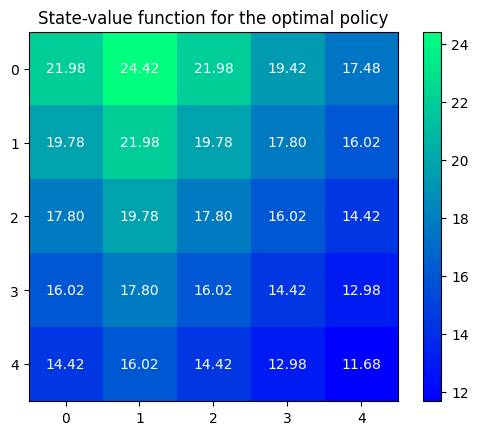

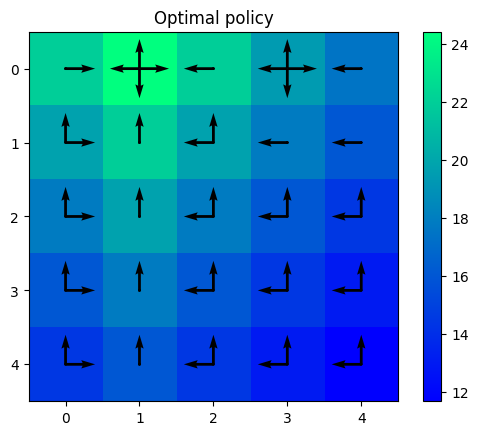

In [7]:
gamma = 0.9
num_states = env.observation_space.nvec.prod()
num_actions = env.action_space.n
P = env.unwrapped.prob.reshape(num_states, num_actions, num_states)
R = env.unwrapped.rewards.reshape(num_states, num_actions, 1)

pol_eval = policy.reshape(num_states, 1, num_actions)
P_eval = np.eye(num_states) - gamma * (pol_eval @ P).squeeze()
R_eval = (pol_eval @ R).squeeze()
V_eval = np.linalg.solve(P_eval, R_eval)

V = V_eval.reshape(env.observation_space.nvec)
plt.imshow(V, cmap="winter")
for state in product(*[range(i) for i in V.shape]):
    plt.text(*state[::-1], f"{V[state]:.2f}", ha="center", va="center", color="white")
plt.title("State-value function for the optimal policy")
plt.colorbar()
plt.show()

argmax = policy == np.max(policy, axis=2, keepdims=True)
right, up, left, down = argmax.transpose(2, 0, 1).astype(np.float32)
zeros = np.zeros(env.observation_space.nvec, dtype=int)
scale = 2.5 * np.max(env.observation_space.nvec)
plt.imshow(V, cmap="winter")
plt.title("Optimal policy")
plt.colorbar()
plt.quiver(right, zeros, scale=scale)
plt.quiver(zeros, up, scale=scale)
plt.quiver(-left, zeros, scale=scale)
plt.quiver(zeros, -down, scale=scale)
plt.show()

#### Exercise 3.20
Draw or describe the optimal state-value function for the golf example.

- ***The optimal state-value function $v_*(s)$ is very similar to the $q_*(s, driver)$ action-value function except for the green. Inside the green, it is better to use the putter where the hole can be completed in one stroke.***

![image](3_20.png)

#### Exercise 3.21
Draw or describe the contours of the optimal action-value function for putting, $q_*(s, putter)$, for the golf example.

- ***The very first action is constrained to be a putter, but afterwards we can use either putter or driver. The contours will be very similar to the state-value function $v_{putter}$, but with the following optimal action-values $q_*(s, putter)$ starting from the tee: $-4, -4, -3, -3, -2, -1, 0$***

![image](3_21.png)

#### Exercise 3.22
Consider the continuing MDP shown to the right. The only decision to be made is that in the top state, where two actions are available, left and right. The numbers show the rewards that are received deterministically after each action. There are exactly two deterministic policies,
$\pi_{left}$ and $\pi_{right}$. What policy is optimal if $\gamma = 0$? If $\gamma = 0.9$? If $\gamma = 0.5$?

- $\gamma = 0.0 \rightarrow \pi_{left}$
- $\gamma = 0.9 \rightarrow \pi_{right}$
- $\gamma = 0.5 \rightarrow both$

#### Exercise 3.23
Give the Bellman equation for $q_*$ for the recycling robot.

- $q_*(h, s) = \alpha [r_s + \gamma \max \{q_*(h, s), q_*(h, w)\}] + (1 - \alpha) [r_s + \gamma \max \{q_*(l, s), q_*(l, w), q_*(l, re)\}]$
- $q_*(h, w) = r_w + \gamma \max \{q_*(h, s), q_*(h, w)\}$
- $q_*(l, s) = \beta [r_s + \gamma \max \{q_*(l, s), q_*(l, w), q_*(l, re)\}] + (1 - \beta) [-3 + \gamma \max \{q_*(h, s), q_*(h, w)\}]$
- $q_*(l, w) = r_w + \gamma \max \{q_*(l, s), q_*(l, w), q_*(l, re)\}$
- $q_*(l, re) = \gamma \max \{q_*(h, s), q_*(h, w)\}$



#### Exercise 3.24
Figure 3.5 gives the optimal value of the best state of the gridworld as 24.4, to one decimal place. Use your knowledge of the optimal policy and (3.8) to express this value symbolically, and then to compute it to three decimal places.

- $v_*(A) = 10 \sum_{k=0}^{\infty} \gamma^{5k} = \frac{10}{1 - \gamma^5} = 24.419$


#### Exercise 3.25
Give an equation for $v_*$ in terms of $q_*$.

- $v_*(s) = \max_a q_*(s, a)$

#### Exercise 3.26
Give an equation for $q_*$ in terms of $v_*$ and the four-argument $p$.

- $q_*(s, a) = \sum_{s',r} p(s', r | s, a) [r + \gamma v_*(s')]$

#### Exercise 3.27
Give an equation for $\pi_*$ in terms of $q_*$.

- $\pi_*(a | s) = \left\{\begin{array}{ll}
      1 / |A| & \text{if } a \in A & A = \argmax_a q_*(s, a) \\
      0 & \text{otherwise}
      \end{array} \right.$

#### Exercise 3.28
Give an equation for $\pi_*$ in terms of $v_*$ and the four-argument $p$.

- $\pi_*(a | s) = \left\{\begin{array}{ll}
      1 / |A| & \text{if } a \in A & A = \argmax_a \sum_{s',r} p(s', r | s, a) [r + \gamma v_*(s')] \\
      0 & \text{otherwise}
      \end{array} \right.$

#### Exercise 3.29
Rewrite the four Bellman equations for the four value functions ($v_\pi$, $v_*$, $q_\pi$, and $q_*$) in terms of the three argument function $p$ (3.4) and the two-argument function $r$ (3.5).

***Original Bellman Equations***
- $v_\pi (s) = \sum_a \pi(a | s) * \sum_{s', r} p(s', r| s, a) [r + \gamma  v_\pi(s')]$
- $v_* (s) = \max_a \sum_{s', r} p(s', r| s, a) [r + \gamma  v_*(s')]$
- $q_\pi(s, a) = \sum_{s', r} p(s', r| s, a)[r + \gamma \sum_{a'} \pi(a' | s') * q_\pi(s', a')]$
- $q_*(s, a) = \sum_{s', r} p(s', r| s, a)[r + \gamma \max_{a'} q_*(s', a')]$

***Modified Bellman Equations V1***
- $v_\pi (s) = \sum_a \pi(a | s) * [r(s, a) + \gamma \sum_{s'} p(s'| s, a) v_\pi(s')]$
- $v_* (s) = \max_a [r(s, a) + \gamma \sum_{s'} p(s'| s, a) v_*(s')]$
- $q_\pi(s, a) = r(s, a) + \gamma \sum_{s'} p(s'| s, a) \sum_{a'} \pi(a' | s') * q_\pi(s', a')$
- $q_*(s, a) = r(s, a) + \gamma \sum_{s'} p(s'| s, a) \max_{a'} q_*(s', a')$

***Modified Bellman Equations V2***
- $v_\pi (s) = \sum_a \pi(a | s) * \sum_{s'} p(s'| s, a) [r(s, a, s') + \gamma v_\pi(s')]$
- $v_* (s) = \max_a \sum_{s'} p(s'| s, a) [r(s, a, s') + \gamma v_*(s')]$
- $q_\pi(s, a) = \sum_{s'} p(s'| s, a) [r(s, a, s') + \gamma \sum_{a'} \pi(a' | s') * q_\pi(s', a')]$
- $q_*(s, a) = \sum_{s'} p(s'| s, a)[r(s, a, s') + \gamma \max_{a'} q_*(s', a')]$